In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
tourism = pd.read_csv('Tourism.csv')
tourism_df=pd.DataFrame(tourism)
tourism_df.head()

,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews,ID_TA
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",5.0,Moderate,136.0,d11752080
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,Expensive,812.0,d693419
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,Expensive,567.0,d696959
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,Expensive,564.0,d1239229
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,Expensive,316.0,d6864170


In [3]:
columns=['Name','City','Cuisine_Style','Rating','Price_Range','Number_of_Reviews','ID_TA'] # Renaming columns
tourism_df.columns=columns
tourism_df.head()

,Name,City,Cuisine_Style,Rating,Price_Range,Number_of_Reviews,ID_TA
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",5.0,Moderate,136.0,d11752080
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,Expensive,812.0,d693419
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,Expensive,567.0,d696959
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,Expensive,564.0,d1239229
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,Expensive,316.0,d6864170


In [4]:
## Cleaning Cuisin_Style column - Removing unwanted characters [,]and '
tourism_df['Cuisine_Style']=tourism_df['Cuisine_Style'].str.replace("[","")
tourism_df['Cuisine_Style']=tourism_df['Cuisine_Style'].str.replace("]","")
tourism_df['Cuisine_Style']=tourism_df['Cuisine_Style'].str.replace("'","")

In [5]:

tourism_df['Cuisine_Style']=tourism_df['Cuisine_Style'].str.split(',')  
tourism_df.head()

,Name,City,Cuisine_Style,Rating,Price_Range,Number_of_Reviews,ID_TA
0,Martine of Martine's Table,Amsterdam,"[French, Dutch, European]",5.0,Moderate,136.0,d11752080
1,De Silveren Spiegel,Amsterdam,"[Dutch, European, Vegetarian Friendly, Glut...",4.5,Expensive,812.0,d693419
2,La Rive,Amsterdam,"[Mediterranean, French, International, Euro...",4.5,Expensive,567.0,d696959
3,Vinkeles,Amsterdam,"[French, European, International, Contempor...",5.0,Expensive,564.0,d1239229
4,Librije's Zusje Amsterdam,Amsterdam,"[Dutch, European, International, Vegetarian...",4.5,Expensive,316.0,d6864170


In [6]:
tourism_df.set_index('Name')
tourism_df=tourism_df.explode('Cuisine_Style')
tourism_df.head()

,Name,City,Cuisine_Style,Rating,Price_Range,Number_of_Reviews,ID_TA
0,Martine of Martine's Table,Amsterdam,French,5.0,Moderate,136.0,d11752080
0,Martine of Martine's Table,Amsterdam,Dutch,5.0,Moderate,136.0,d11752080
0,Martine of Martine's Table,Amsterdam,European,5.0,Moderate,136.0,d11752080
1,De Silveren Spiegel,Amsterdam,Dutch,4.5,Expensive,812.0,d693419
1,De Silveren Spiegel,Amsterdam,European,4.5,Expensive,812.0,d693419


In [8]:
print('The Most Desired Cuisine is :',tourism_df['Cuisine_Style'].value_counts().head(1))
print('------------------------------------------')
print('The Least Desired Type of Cuisine are:',tourism_df['Cuisine_Style'].value_counts().tail(6))

The Most Desired Cuisine is :  Vegetarian Friendly    31449
Name: Cuisine_Style, dtype: int64
------------------------------------------
The Least Desired Type of Cuisine are: Polynesian    1
Tunisian      1
Ecuadorean    1
Jamaican      1
Salvadoran    1
Balti         1
Name: Cuisine_Style, dtype: int64


In [9]:
count=pd.DataFrame(tourism_df['Cuisine_Style'].value_counts()).reset_index()
cols=['cusine','count']
count.columns=cols

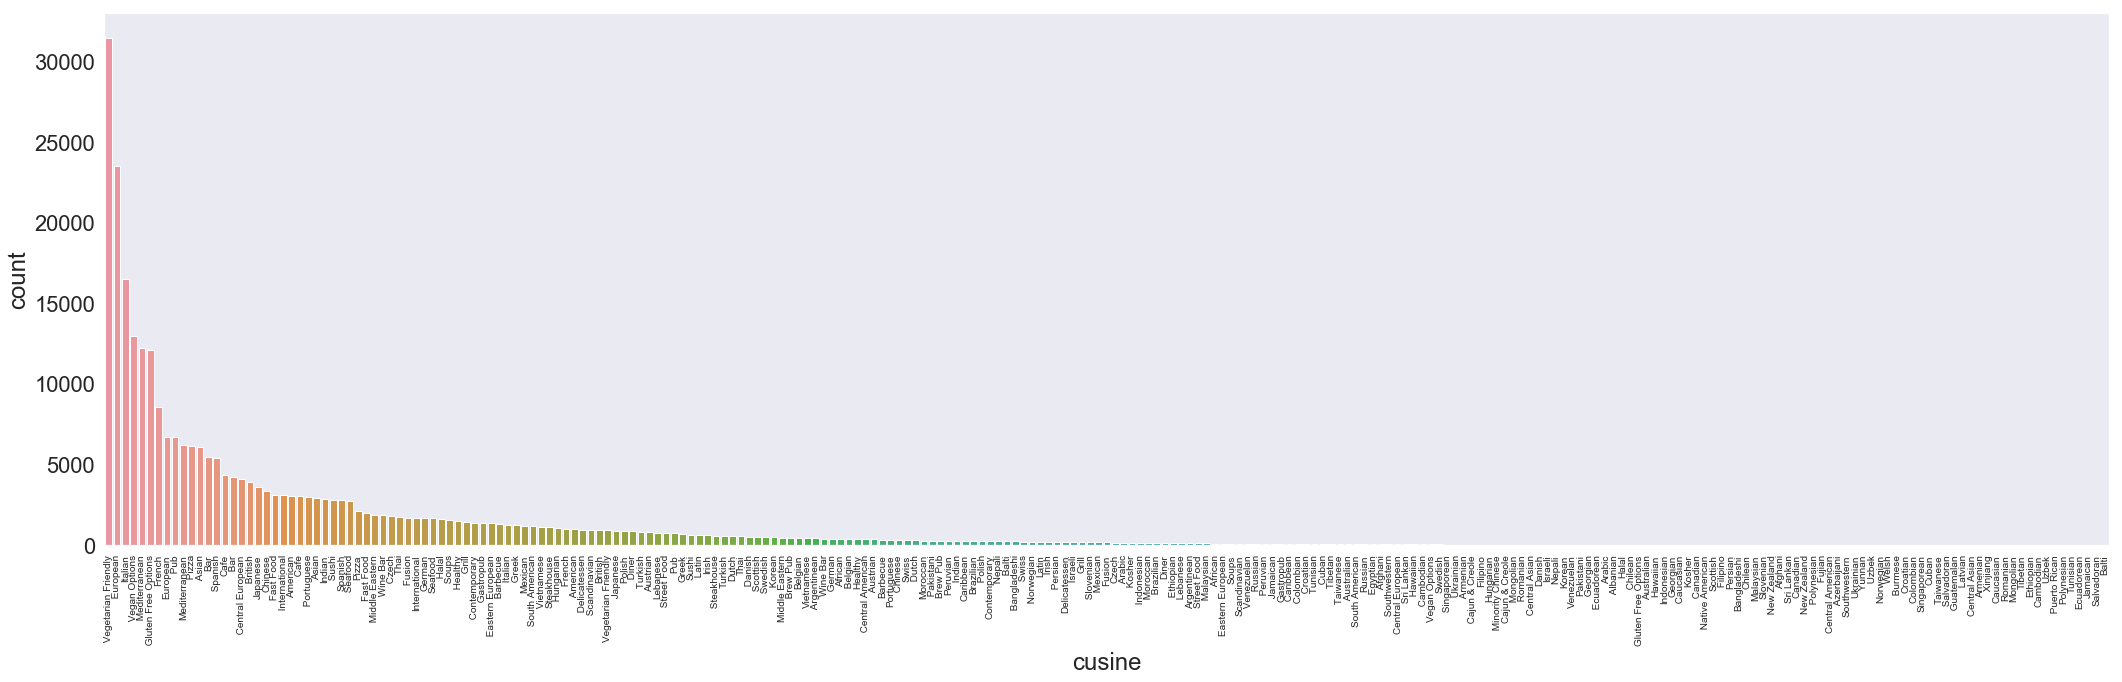

In [10]:
fig=plt.figure(figsize=(30,10))
sns.set_style('dark')
sns.set_context("notebook",font_scale=2)
g=sns.barplot(x='cusine',y='count',data=count)
plt.xticks(rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.savefig('cuisine.jpg')    # saving figure as cuisine.jpg
plt.show()

In [11]:
favorite=tourism_df[['Rating','City','Cuisine_Style']]
cuisines=favorite.groupby(['City','Cuisine_Style']).count().sort_values(by='Rating').groupby(level=0).tail(1)
cuisines.columns=['Count of Repetition']
cuisines.to_csv('citywise.csv')
cuisines.sort_values(['City','Count of Repetition']).head(5)


,,Count of Repetition
City,Cuisine_Style,
Amsterdam,Vegetarian Friendly,1327
Athens,Greek,637
Barcelona,Spanish,2297
Berlin,Vegetarian Friendly,1706
Bratislava,Central European,171


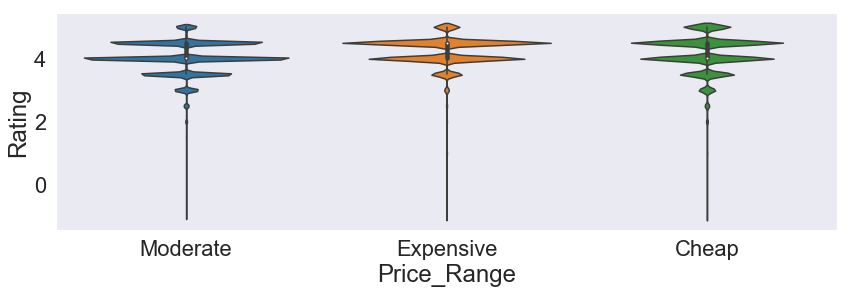

In [12]:
fig=plt.figure(figsize=(14,4))
sns.violinplot(x='Price_Range',y='Rating',data=tourism_df)
plt.savefig('pricerating.jpg',dpi=1000)

In [13]:
repeat=tourism_df[['Cuisine_Style','Rating','ID_TA']]
repeated=repeat[repeat.duplicated('ID_TA')]  # DataFrame with only repeated values
mostliked_repeat=repeated.groupby(['ID_TA','Cuisine_Style']).agg({'Rating':'mean'}).reset_index()
order = mostliked_repeat.groupby('Cuisine_Style').Rating.mean().sort_values(ascending=False).reset_index()
orderString = list(order['Cuisine_Style'])
mostliked_repeat

,ID_TA,Cuisine_Style,Rating
0,d10000500,Thai,4.5
1,d10000500,Vegan Options,4.5
2,d10000500,Vegetarian Friendly,4.5
3,d10000500,Vietnamese,4.5
4,d10002410,Contemporary,5.0
...,...,...,...
192390,d9999269,Asian,3.5
192391,d9999269,Sushi,3.5
192392,d9999938,Contemporary,3.5
192393,d9999938,International,3.5


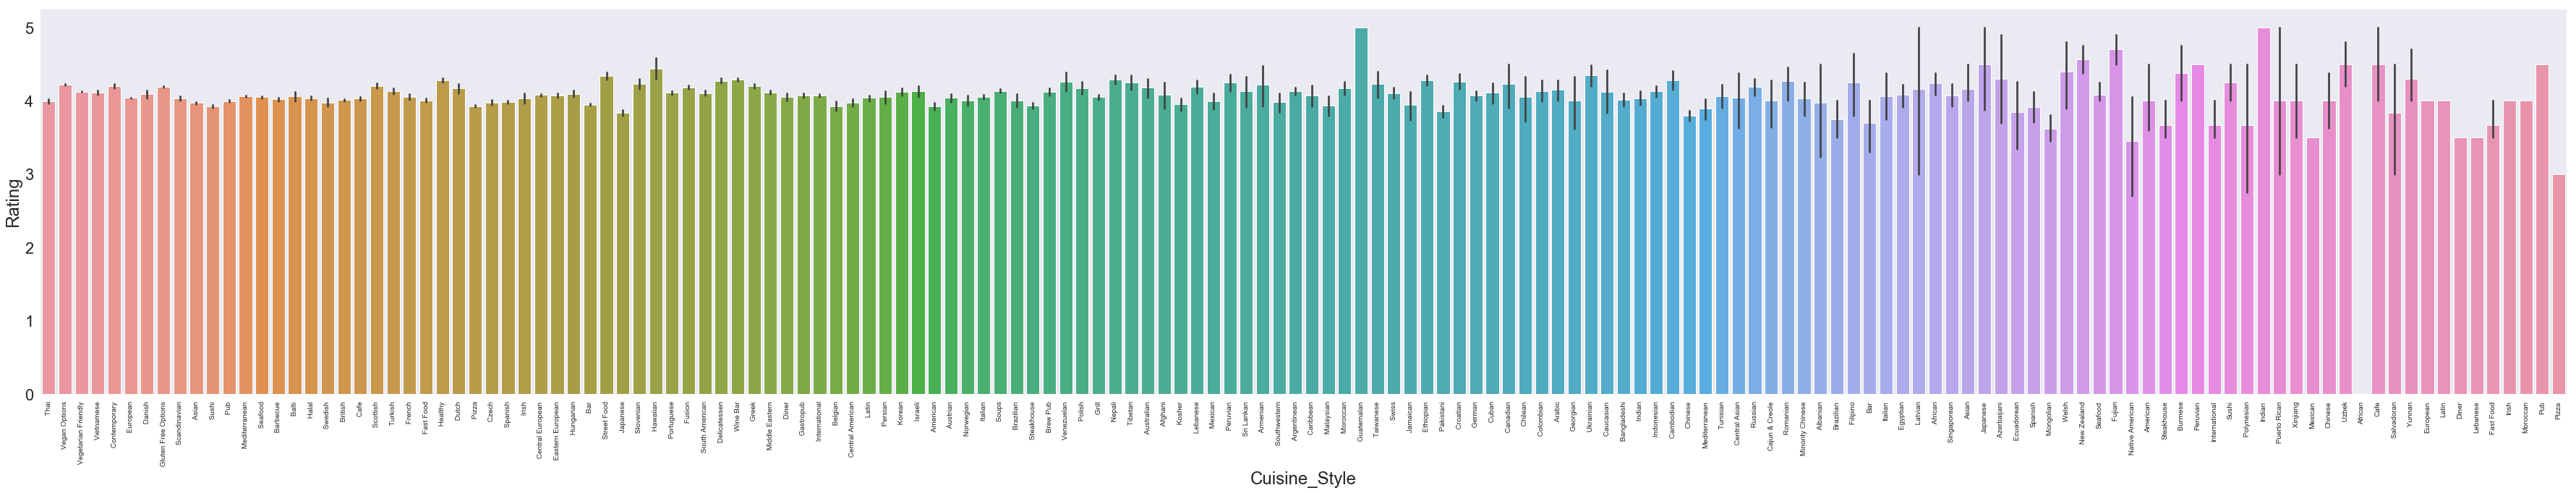

In [14]:
fig=plt.figure(figsize=(50,10))
sns.set_color_codes("pastel")
g=sns.barplot(x="Cuisine_Style", y="Rating", data=mostliked_repeat)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.savefig('Repeated.jpg')    # saving figure as cuisine.jpg
plt.show()

In [15]:
grouped=tourism_df.groupby(['Price_Range'])
grouped=grouped['Number_of_Reviews'].aggregate([np.mean,np.sum,np.std])
grouped.columns=['No. of Reviews','Mean Reviews','Standard Deviation of Reviews']
grouped.index.name = 'Price Point'
grouped.to_csv('Price.csv')
grouped

,No. of Reviews,Mean Reviews,Standard Deviation of Reviews
Price Point,,,
Cheap,127.631172,6488003.0,301.531168
Expensive,465.212231,7310345.0,692.867832
Moderate,249.228259,46121434.0,428.594789


In [16]:
group=tourism_df.groupby(['Price_Range','Cuisine_Style']).Rating.mean()
group=group.to_frame().reset_index()
group = group.groupby('Price_Range').apply(lambda x: x.sort_values('Rating'))
group = group.drop('Price_Range',axis=1).reset_index()
group = group.groupby('Price_Range').tail(5)
group

,Price_Range,level_1,Cuisine_Style,Rating
214,Cheap,10,Azerbaijani,5.00
215,Cheap,211,Tibetan,5.00
216,Cheap,213,Ukrainian,5.00
217,Cheap,140,Central American,5.00
218,Cheap,192,Polynesian,NaN
383,Expensive,242,Colombian,5.00
384,Expensive,223,Armenian,5.00
385,Expensive,260,Georgian,NaN
386,Expensive,333,Caribbean,NaN
387,Expensive,377,South American,NaN


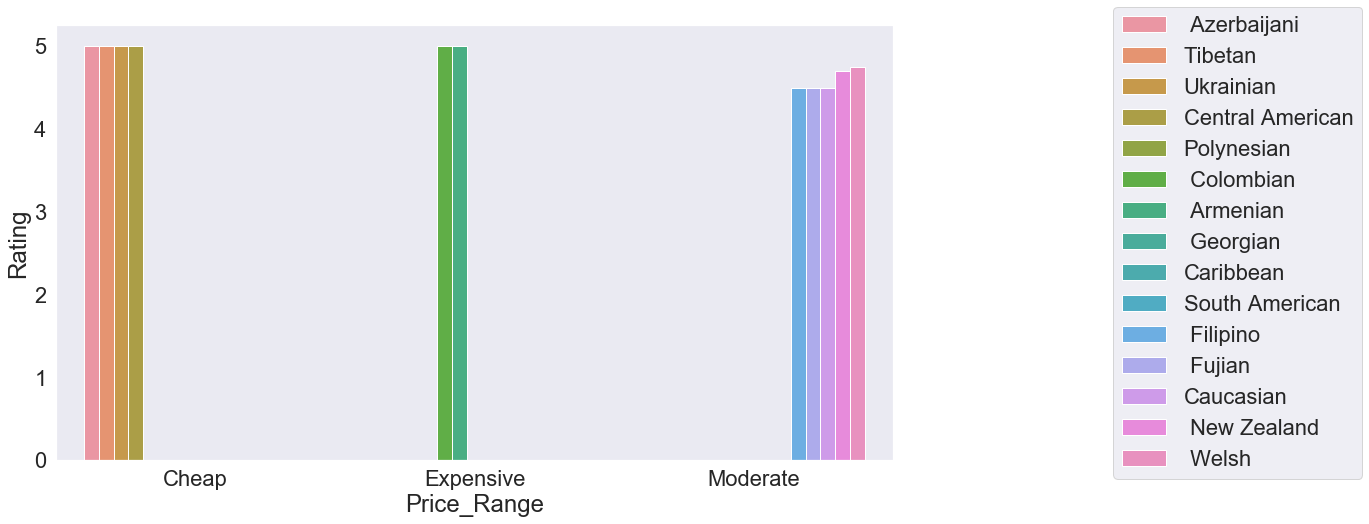

In [17]:
fig = plt.figure(figsize=(15,8))
chart=sns.barplot(x='Price_Range',y='Rating',hue='Cuisine_Style',data=group)
chart.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()